In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
df_corruptions = pd.read_csv('R04_corruptions.csv')

In [5]:
chart = alt.Chart(df_corruptions).mark_point().encode(
    x='Corruption Perception (X)',
    y='Government Transparency (Y)',
    tooltip=['Corruption Perception (X)', 'Government Transparency (Y)']
).properties(
    title='Scatter Plot - Corruption Perception vs. Government Transparency'
).interactive()
chart.save('corruption_scatter_plot.json')

In [6]:
print("\nStatistik Deskriptif:")
print(df_corruptions.describe().to_markdown(numalign="left", stralign="left"))


Statistik Deskriptif:
|       | Corruption Perception (X)   | Government Transparency (Y)   |
|:------|:----------------------------|:------------------------------|
| count | 55                          | 55                            |
| mean  | 3.30727                     | 64.1455                       |
| std   | 0.784539                    | 9.3143                        |
| min   | 2                           | 50                            |
| 25%   | 2.65                        | 56                            |
| 50%   | 3.3                         | 63                            |
| 75%   | 4                           | 71.5                          |
| max   | 4.5                         | 82                            |


In [7]:
X = df_corruptions[['Corruption Perception (X)']]  
y = df_corruptions['Government Transparency (Y)']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.3f}')

R-squared: 0.853


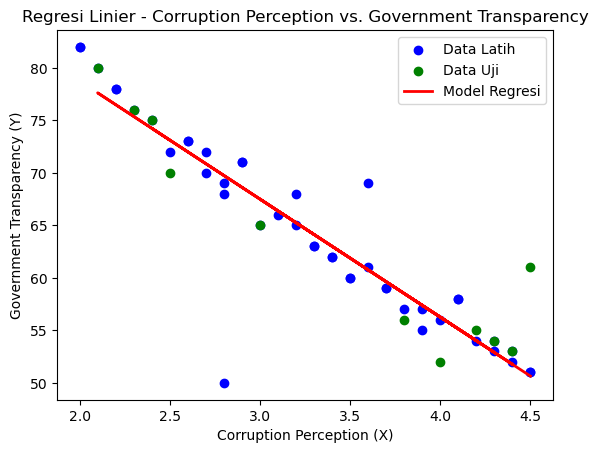

In [11]:
plt.scatter(X_train, y_train, color='blue', label='Data Latih')
plt.scatter(X_test, y_test, color='green', label='Data Uji')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Model Regresi')
plt.xlabel('Corruption Perception (X)')
plt.ylabel('Government Transparency (Y)')
plt.title('Regresi Linier - Corruption Perception vs. Government Transparency')
plt.legend()
plt.savefig('linear_regression_model.png')
plt.show()

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [13]:
df_bank_customers = pd.read_csv('K04_bank_customers.csv', delimiter=';')

In [14]:
print("\nStatistik Deskriptif:")
print(df_bank_customers.describe().to_markdown(numalign="left", stralign="left"))


Statistik Deskriptif:
|       | age     | balance   | day     | duration   | campaign   | pdays   | previous   |
|:------|:--------|:----------|:--------|:-----------|:-----------|:--------|:-----------|
| count | 45211   | 45211     | 45211   | 45211      | 45211      | 45211   | 45211      |
| mean  | 40.9362 | 1362.27   | 15.8064 | 258.163    | 2.76384    | 40.1978 | 0.580323   |
| std   | 10.6188 | 3044.77   | 8.32248 | 257.528    | 3.09802    | 100.129 | 2.30344    |
| min   | 18      | -8019     | 1       | 0          | 1          | -1      | 0          |
| 25%   | 33      | 72        | 8       | 103        | 1          | -1      | 0          |
| 50%   | 39      | 448       | 16      | 180        | 2          | -1      | 0          |
| 75%   | 48      | 1428      | 21      | 319        | 3          | -1      | 0          |
| max   | 95      | 102127    | 31      | 4918       | 63         | 871     | 275        |


In [15]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
encoded_features = encoder.fit_transform(df_bank_customers[categorical_features])

encoded_df = pd.DataFrame(encoded_features)
encoded_df = encoded_df.add_prefix('encoded_')

df_bank_customers_encoded = pd.concat([df_bank_customers, encoded_df], axis=1)
df_bank_customers_encoded = df_bank_customers_encoded.drop(categorical_features, axis=1)

In [16]:
X = df_bank_customers_encoded.drop('y', axis=1)
y = df_bank_customers_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()